<a href="https://colab.research.google.com/github/IngridLaila/Projeto-Analise-de-Dados/blob/main/An%C3%A1lise%20de%20Dados%20CENIPA%5CETL%20e%20An%C3%A1lise%20Explorat%C3%B3ria/An%C3%A1lise_CENIPA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Python para Análise de Dados**

Autora: Ingrid Laila

# **ETL**


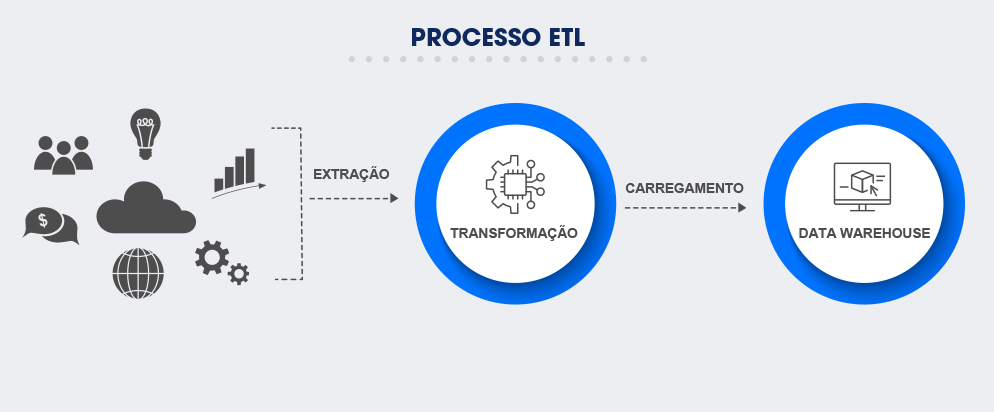

ETL: Como funciona o processo?
*  Extração (E): nesta fase, os dados são coletados de diferentes sistemas
organizacionais e conduzidos a um espaço temporário (staging area - durante a exceução da etl), onde são convertidos em um mesmo formato para transformação.
*  Transformação (T): os dados brutos são lapidados e padronizados conforme as necessidades da empresa. Ao fim desta etapa, os dados estão “limpos”, estruturados e prontos para armazenamento.
*  Carregamento (L): os dados tratados são enviados a um repositório específico, onde serão armazenados em segurança e acionados para consulta interna.

# **Análise da CENIPA**

## **Informações gerais da base de dados**

A base de dados de ocorrências aeronáuticas é gerenciada pelo Centro de Investigação e Prevenção de Acidentes Aeronáuticos (CENIPA). Constam nesta base de dados as ocorrências aeronáuticas notificadas ao CENIPA no anos de 2010 a 2021 que ocorreram em solo brasileiro.

Dentre as informações disponíveis estão os dados sobre as aeronaves envolvidas, fatalidades, local, data, horário dos eventos e informações taxonômicas típicas das investigações de acidentes (AIG). São resguardadas a privacidade de pessoas físicas/jurídicas envolvidas conforme previsto pela Lei de Acesso à Informação (Lei n° 12.527, de 18 de novembro de 2011).

Essa base de dados é composta por informações preliminares provenientes do formulário CENIPA-05 (Ficha de Notificação de Ocorrências Aeronáuticas) e consolidada a partir dos relatórios de investigações publicados. Outra forma de visualização desses dados é pelo [__*Painel SIPAER*__](https://painelsipaer.cenipa.fab.mil.br/QvAJAXZfc/opendoc.htm?document=SIGAER%2Fgia%2Fqvw%2Fpainel_sipaer.qvw&host=QVS%40cirros31-37&anonymous=true) disponível na página do CENIPA.

Dados proveniente dos Programas de Gerenciamento de Prevenção administrados pelo CENIPA (Emissão de Raio Laser e Risco Baloeiro) não constam nesta base. Esses programas possuem formulários próprios para coleta de dados com foco exclusivo para gerenciamento do risco, enquanto os dados coletados pelo formulário CENIPA-05 têm foco principal na investigação de acidentes (AIG).

**Dicionário de dados:**

Tabela Ocorrência - Informações sobre as ocorrências de acidentes aeronaúticos.

codigo_ocorrencia: chave primária (identificador) da tabela.

codigo_ocorrencia1: chave estrangeria que se conecta a tabela "OCORRENCIA_TIPO".

codigo_ocorrencia2: chave estrangeria que se conecta a tabela "AERONAVA".

codigo_ocorrencia3: chave estrangeria que se conecta a tabela "FATOR_CONTRIBUINTE".

codigo_ocorrencia4: chave estrangeria que se conecta a tabela "RECOMENDACAO".

ocorrencia_classificacao: classificação das ocorrências em "Acidente", "Incidente", "Incidente Grave".

ocorrencia_latitude: latitude do local onde ocorreu o acidente.

ocorrencia_longitude: longitude do local onde ocorreu o acidente.

ocorrencia_cidade: cidade onde ocorreu o acidente.

ocorrencia_uf: estado onde ocorreu o acidente.

ocorrencia_pais: país onde ocorreu o acidente.

ocorrencia_aerodromo: aerodrómo onde ocorreu o acidente. O valor ** indica que o acidente ocorreu fora do aerodromo.

ocorrencia_dia: dia que ocorreu o acidente.

ocorrencia_hora: hora que ocorreu o acidente.

investigacao_aeronove_liberada: indica se a aeronave foi liberada ou não.

investigacao_status: status da investigação, possue os valores "Finalizado" ou "Ativa"

divulgacao_relatorio_numero: número do relatório realizado pela CENIPA

divulgacao_relatorio_publicado: indica se o relatório foi publicado ou não.

divulgacao_dia_publicacao: data da publicação do relatório realizado pela CENIPA.

total_recomendacoes: quantidade de recomendações realizadas pela CENIPA.

total_aeronave_envolvidas: quantidade de aeronaves envolvidas no acidentes.

ocorrencia_saida_pista: valores "Sim" ou "Não"







Fonte: https://dados.gov.br/dados/conjuntos-dados/ocorrencias-aeronauticas-da-aviacao-civil-brasileira

## **Instalação de Pacotes**

Obs: Ao adicionar o ponto de exclamação antes de um comando em uma célula do Colab, você está indicando ao ambiente que deseja executar esse comando no shell do sistema subjacente.

O uso do ponto de exclamação no Colab é uma convenção específica desse ambiente para permitir a execução de comandos do sistema operacional diretamente no notebook, facilitando a instalação de pacotes e a execução de outras tarefas relacionadas ao sistema.

In [ ]:
!pip install gcsfs
!pip install pandera

## **Abertura de Bibliotecas**

In [2]:
# Abertura de bibliotecas
import os                           # Importar a biblioteca "os" para interagir com o sistema operacional
import pandas as pd                 # Importar a biblioteca "pandas" e atribuir um apelido "pd"
import numpy as np                  # O numpy é uma biblioteca popular para computação numérica em Python, fornecendo suporte para matrizes multidimensionais, funções matemáticas avançadas e manipulação eficiente de dados numéricos
import pandera as pa                # O pandera é uma biblioteca que adiciona recursos de validação de dados ao pandas, permitindo a definição de esquemas e regras para verificar a qualidade e integridade dos dados.
from google.cloud import storage    # Esse módulo fornece funcionalidades para interagir com o serviço de armazenamento em nuvem do Google Cloud Platform (GCP)

In [3]:
# Ignorar avisos
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Configuração da quantidade de colunas para aparecer em um Datraframe
# O método set_option() é um método do pandas que permite definir opções de exibição. Ele é usado para definir opções como o número máximo de linhas e colunas que o pandas deve exibir ao imprimir um DataFrame.
pd.set_option('display.max_columns',200)

# **EXTRAÇÃO**

### Google Drive


In [5]:
# Comando de abertura para Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


*   **Tipos de separador:** Vírgula (,) - Ponto e vírgula (;) - Tabulação (\t) - Espaço em branco ( )
*   **Enconding:** UTF-8, ISO-8859-1, UTF-16, UTF-32, ASCII

In [6]:
# Extração por Google Drive
df = pd.read_csv('/content/drive/MyDrive/Bootcamp de Analista de Dados/Python/cenipa_bruto - cenipa_bruto.csv',
                 sep=',',
                 encoding='UTF-8',
                 #parse_dates=['ocorrencia_dia'],
                 dayfirst = True)

### Google Cloud


*   Documentação: https://cloud.google.com/docs/authentication?hl=pt-br


In [ ]:
# CONFIGURANDO DA CHAVE DE SEGURANCA - ACESSO O PROJETO
serviceAccount = '/content/atividade-gc-251504cb2860.json'
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = serviceAccount

In [ ]:
# Configurações Google Cloud Storage - ACESSO AO BUCKET
client = storage.Client()
bucket = client.get_bucket('nome_bucket')
bucket.blob('nome_do_arquivo')
path = 'gsutil'

In [ ]:
# Abertura da base de dados e cópia de segurança (bucket)
df = pd.read_csv(path,
                 sep=',',
                 encoding='UTF-8',
                 dayfirst = True)
dfback = df.copy()

## **Pré-Análise**

In [7]:
# Visualização do dataframe
df

,codigo_ocorrencia,codigo_ocorrencia1,codigo_ocorrencia2,codigo_ocorrencia3,codigo_ocorrencia4,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista
0,81027,81027,81027,81027,81027,INCIDENTE GRAVE,NaN,NaN,SÃO PAULO,SP,BRASIL,SBSP,09/10/2022,16:30:00,SIM,ATIVA,A DEFINIR,NÃO,NaN,0,1,SIM
1,81030,81030,81030,81030,81030,INCIDENTE,NaN,NaN,VITÓRIA,ES,BRASIL,SBVT,09/10/2022,16:20:00,SIM,ATIVA,A DEFINIR,NÃO,NaN,0,1,NÃO
2,81023,81023,81023,81023,81023,INCIDENTE GRAVE,NaN,NaN,AMERICANA,SP,BRASIL,SDAI,06/10/2022,15:30:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,SIM
3,81029,81029,81029,81029,81029,INCIDENTE,NaN,NaN,BELO HORIZONTE,MG,BRASIL,SBBH,06/10/2022,00:44:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
4,81025,81025,81025,81025,81025,INCIDENTE,NaN,NaN,MANAUS,AM,BRASIL,SBEG,05/10/2022,20:56:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6764,40324,40324,40324,40324,40324,INCIDENTE,NaN,NaN,PELOTAS,RS,BRASIL,SBPK,05/01/2010,19:25:00,SIM,FINALIZADA,NaN,NÃO,NaN,0,1,NÃO
6765,39527,39527,39527,39527,39527,ACIDENTE,-131.066.666.667,-559.930.555.556,LUCAS DO RIO VERDE,MT,BRASIL,***,04/01/2010,17:30:00,SIM,FINALIZADA,A-539/CENIPA/2018,SIM,2019-10-28,0,1,NÃO
6766,40211,40211,40211,40211,40211,INCIDENTE,***,***,RIO DE JANEIRO,RJ,BRASIL,***,03/01/2010,12:00:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
6767,40349,40349,40349,40349,40349,INCIDENTE,NaN,NaN,BELÉM,PA,BRASIL,SBBE,03/01/2010,11:05:00,SIM,FINALIZADA,NaN,NÃO,NaN,0,1,NÃO


In [8]:
# Visualização dos dados começando pelo cabeçalho
df.head(10)

,codigo_ocorrencia,codigo_ocorrencia1,codigo_ocorrencia2,codigo_ocorrencia3,codigo_ocorrencia4,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista
0,81027,81027,81027,81027,81027,INCIDENTE GRAVE,NaN,NaN,SÃO PAULO,SP,BRASIL,SBSP,09/10/2022,16:30:00,SIM,ATIVA,A DEFINIR,NÃO,NaN,0,1,SIM
1,81030,81030,81030,81030,81030,INCIDENTE,NaN,NaN,VITÓRIA,ES,BRASIL,SBVT,09/10/2022,16:20:00,SIM,ATIVA,A DEFINIR,NÃO,NaN,0,1,NÃO
2,81023,81023,81023,81023,81023,INCIDENTE GRAVE,NaN,NaN,AMERICANA,SP,BRASIL,SDAI,06/10/2022,15:30:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,SIM
3,81029,81029,81029,81029,81029,INCIDENTE,NaN,NaN,BELO HORIZONTE,MG,BRASIL,SBBH,06/10/2022,00:44:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
4,81025,81025,81025,81025,81025,INCIDENTE,NaN,NaN,MANAUS,AM,BRASIL,SBEG,05/10/2022,20:56:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
5,81019,81019,81019,81019,81019,ACIDENTE,NaN,NaN,PORTO ALEGRE,RS,BRASIL,***,03/10/2022,20:50:00,NÃO,ATIVA,A DEFINIR,NÃO,NaN,0,1,NÃO
6,81022,81022,81022,81022,81022,INCIDENTE,NaN,NaN,LOBATO,PR,BRASIL,***,03/10/2022,15:38:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
7,81021,81021,81021,81021,81021,ACIDENTE,NaN,NaN,NOVA BANDEIRANTES,MT,BRASIL,***,02/10/2022,19:00:00,NÃO,ATIVA,A DEFINIR,NÃO,NaN,0,1,SIM
8,81009,81009,81009,81009,81009,INCIDENTE GRAVE,NaN,NaN,NAVIRAÍ,MS,BRASIL,**NI,01/10/2022,10:10:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,SIM
9,81012,81012,81012,81012,81012,INCIDENTE,NaN,NaN,LINHARES,ES,BRASIL,***,30/09/2022,12:20:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO


In [9]:
# Visualização do df começando pelo final
df.tail()

,codigo_ocorrencia,codigo_ocorrencia1,codigo_ocorrencia2,codigo_ocorrencia3,codigo_ocorrencia4,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista
6764,40324,40324,40324,40324,40324,INCIDENTE,NaN,NaN,PELOTAS,RS,BRASIL,SBPK,05/01/2010,19:25:00,SIM,FINALIZADA,NaN,NÃO,NaN,0,1,NÃO
6765,39527,39527,39527,39527,39527,ACIDENTE,-131.066.666.667,-559.930.555.556,LUCAS DO RIO VERDE,MT,BRASIL,***,04/01/2010,17:30:00,SIM,FINALIZADA,A-539/CENIPA/2018,SIM,2019-10-28,0,1,NÃO
6766,40211,40211,40211,40211,40211,INCIDENTE,***,***,RIO DE JANEIRO,RJ,BRASIL,***,03/01/2010,12:00:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
6767,40349,40349,40349,40349,40349,INCIDENTE,NaN,NaN,BELÉM,PA,BRASIL,SBBE,03/01/2010,11:05:00,SIM,FINALIZADA,NaN,NÃO,NaN,0,1,NÃO
6768,40351,40351,40351,40351,40351,INCIDENTE,NaN,NaN,RIO DE JANEIRO,RJ,BRASIL,SBRJ,03/01/2010,03:00:00,SIM,FINALIZADA,NaN,NÃO,NaN,0,1,NÃO


In [10]:
# Visualização do df de forma aleatória
# sample() é um método da biblioteca Pandas em Python que é usado para retornar uma amostra aleatória de linhas de um DataFrame
df.sample(5)

,codigo_ocorrencia,codigo_ocorrencia1,codigo_ocorrencia2,codigo_ocorrencia3,codigo_ocorrencia4,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista
2872,66298,66298,66298,66298,66298,INCIDENTE,-229.772.222.222,-433.716.666.667,RIO DE JANEIRO,RJ,BRASIL,SBJR,20/01/2017,10:04:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
3756,53122,53122,53122,53122,53122,INCIDENTE,NaN,NaN,BRASÍLIA,DF,BRASIL,SBBR,11/01/2015,00:07:00,***,FINALIZADA,***,NÃO,NaN,0,1,NÃO
1772,78757,78757,78757,78757,78757,ACIDENTE,-23.234.444,-46.690.556,ATIBAIA,SP,BRASIL,SBMT,12/07/2019,17:15:00,SIM,FINALIZADA,A-104/CENIPA/2019,SIM,2022-09-21,0,1,NÃO
1937,78553,78553,78553,78553,78553,INCIDENTE,-234.355.555.55,-464.730.555.55,GUARULHOS,SP,BRASIL,SBGR,24/02/2019,18:58:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
5134,46647,46647,46647,46647,46647,INCIDENTE,NaN,NaN,PORTO ALEGRE,RS,BRASIL,SBPA,23/10/2012,10:01:00,***,FINALIZADA,***,NÃO,NaN,0,1,NÃO


In [11]:
# Tamanho ( linhas e colunas) do df
df.shape

(6769, 22)

In [12]:
# Verificar o tipo de dado em cada coluna
# o tipo objeto no Pandas pode ser: string, números, listas, dicionários e outros objetos
df.dtypes

codigo_ocorrencia                  int64
codigo_ocorrencia1                 int64
codigo_ocorrencia2                 int64
codigo_ocorrencia3                 int64
codigo_ocorrencia4                 int64
ocorrencia_classificacao          object
ocorrencia_latitude               object
ocorrencia_longitude              object
ocorrencia_cidade                 object
ocorrencia_uf                     object
ocorrencia_pais                   object
ocorrencia_aerodromo              object
ocorrencia_dia                    object
ocorrencia_hora                   object
investigacao_aeronave_liberada    object
investigacao_status               object
divulgacao_relatorio_numero       object
divulgacao_relatorio_publicado    object
divulgacao_dia_publicacao         object
total_recomendacoes                int64
total_aeronaves_envolvidas         int64
ocorrencia_saida_pista            object
dtype: object

In [13]:
# Contar a quantidade de valores não nulos no dataframe
df.count()

codigo_ocorrencia                 6769
codigo_ocorrencia1                6769
codigo_ocorrencia2                6769
codigo_ocorrencia3                6769
codigo_ocorrencia4                6769
ocorrencia_classificacao          6769
ocorrencia_latitude               5135
ocorrencia_longitude              5135
ocorrencia_cidade                 6769
ocorrencia_uf                     6769
ocorrencia_pais                   6769
ocorrencia_aerodromo              6769
ocorrencia_dia                    6769
ocorrencia_hora                   6767
investigacao_aeronave_liberada    6531
investigacao_status               6428
divulgacao_relatorio_numero       5987
divulgacao_relatorio_publicado    6769
divulgacao_dia_publicacao         1781
total_recomendacoes               6769
total_aeronaves_envolvidas        6769
ocorrencia_saida_pista            6769
dtype: int64

In [14]:
# Informações detalhadas do DF
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6769 entries, 0 to 6768
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   codigo_ocorrencia               6769 non-null   int64 
 1   codigo_ocorrencia1              6769 non-null   int64 
 2   codigo_ocorrencia2              6769 non-null   int64 
 3   codigo_ocorrencia3              6769 non-null   int64 
 4   codigo_ocorrencia4              6769 non-null   int64 
 5   ocorrencia_classificacao        6769 non-null   object
 6   ocorrencia_latitude             5135 non-null   object
 7   ocorrencia_longitude            5135 non-null   object
 8   ocorrencia_cidade               6769 non-null   object
 9   ocorrencia_uf                   6769 non-null   object
 10  ocorrencia_pais                 6769 non-null   object
 11  ocorrencia_aerodromo            6769 non-null   object
 12  ocorrencia_dia                  6769 non-null   

In [15]:
# Backup local do df
dfback1 = df.copy()

# **TRANSFORMAÇÃO**

**Verificações gerais e básicas de qualquer base de dados, se houver os casos abaixo:**

*  Escolher as possíveis colunas importantes para a análise;
*  Verificar se há colunas colunas iguais;
*  Verificação e tratamento de valores (ou observações) únicos;
*  Verificação e tratamento de duplicadas
*  Verificação e tratamento de inconsistência
*  Verificação e tratamento de valores nulos
*  Tradução/Renomeação
*  Transformação de tipos adequados dos dados
*  Garantia de qualidade e integridade dos dados

In [16]:
# Visualização do df de forma aleatória:
df.sample(5)

,codigo_ocorrencia,codigo_ocorrencia1,codigo_ocorrencia2,codigo_ocorrencia3,codigo_ocorrencia4,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista
928,79910,79910,79910,79910,79910,INCIDENTE GRAVE,2.765,-622.213.888,ALTO ALEGRE,RR,BRASIL,SJYG,19/02/2021,13:30:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
621,80286,80286,80286,80286,80286,ACIDENTE,-3.002.534,-60.094.019,MANAUS,AM,BRASIL,***,10/09/2021,14:00:00,SIM,ATIVA,A-103/CENIPA/2021,NÃO,NaN,0,1,NÃO
5595,45668,45668,45668,45668,45668,INCIDENTE,NaN,NaN,CAMPOS DOS GOYTACAZES,RJ,BRASIL,***,01/02/2012,12:30:00,***,FINALIZADA,***,NÃO,NaN,0,1,NÃO
6319,43257,43257,43257,43257,43257,INCIDENTE,NaN,NaN,CAMPINAS,SP,BRASIL,SBKP,19/10/2010,02:40:00,SIM,FINALIZADA,NaN,NÃO,NaN,0,1,NÃO
2312,77849,77849,77849,77849,77849,INCIDENTE GRAVE,\t-23.15444444\t,\t-51.28805556\t,LONDRINA,PR,BRASIL,***,27/04/2018,12:00:00,SIM,NaN,NaN,NÃO,NaN,0,1,NÃO


**Verificar se há colunas iguais**

In [17]:
# Modo 1: Verificando se as colunas são iguais
if (df['codigo_ocorrencia'] == df['codigo_ocorrencia4']).all():
    print("As colunas são iguais.")
else:
    print("As colunas são diferentes.")

As colunas são iguais.


In [18]:
# Modo 2: Verificando se as colunas são iguais
# Nome das colunas a serem verificadas
colunas_verificar = ['codigo_ocorrencia1', 'codigo_ocorrencia2', 'codigo_ocorrencia3', 'codigo_ocorrencia4']

# Verificando se as colunas são iguais à coluna 'codigo_ocorrencia'
for coluna in colunas_verificar:
    if (df['codigo_ocorrencia']== df[coluna]).all():
        print(f"A coluna {coluna} é igual à coluna 'codigo_ocorrencia'.")
    else:
        print(f"A coluna {coluna} é diferente da coluna 'codigo_ocorrencia'.")

A coluna codigo_ocorrencia1 é igual à coluna 'codigo_ocorrencia'.
A coluna codigo_ocorrencia2 é igual à coluna 'codigo_ocorrencia'.
A coluna codigo_ocorrencia3 é igual à coluna 'codigo_ocorrencia'.
A coluna codigo_ocorrencia4 é igual à coluna 'codigo_ocorrencia'.


In [19]:
# Verifica se dados são unicos na coluna
df.codigo_ocorrencia.is_unique

True

In [20]:
# Retirada de colunas identicas (codigo_ocorrencia1 , codigo_ocorrencia2,codigo_ocorrencia3 , codigo_ocorrencia4)
# O parâmetro axis=1 indica que as colunas devem ser removidas (em oposição a linhas, que seria axis=0).
# O parâmetro inplace=True indica que a operação deve ser feita diretamente no DataFrame df, ou seja, o DataFrame será alterado permanentemente

df.drop(['codigo_ocorrencia1',
         'codigo_ocorrencia2',
         'codigo_ocorrencia3',
         'codigo_ocorrencia4'],axis=1, inplace=True)

In [21]:
df.dtypes

codigo_ocorrencia                  int64
ocorrencia_classificacao          object
ocorrencia_latitude               object
ocorrencia_longitude              object
ocorrencia_cidade                 object
ocorrencia_uf                     object
ocorrencia_pais                   object
ocorrencia_aerodromo              object
ocorrencia_dia                    object
ocorrencia_hora                   object
investigacao_aeronave_liberada    object
investigacao_status               object
divulgacao_relatorio_numero       object
divulgacao_relatorio_publicado    object
divulgacao_dia_publicacao         object
total_recomendacoes                int64
total_aeronaves_envolvidas         int64
ocorrencia_saida_pista            object
dtype: object

**Verificação e tratamento de valores nulos**

In [22]:
# Verificar dados Nulos , ausentes , etc - isnull()
df.isna().sum()

codigo_ocorrencia                    0
ocorrencia_classificacao             0
ocorrencia_latitude               1634
ocorrencia_longitude              1634
ocorrencia_cidade                    0
ocorrencia_uf                        0
ocorrencia_pais                      0
ocorrencia_aerodromo                 0
ocorrencia_dia                       0
ocorrencia_hora                      2
investigacao_aeronave_liberada     238
investigacao_status                341
divulgacao_relatorio_numero        782
divulgacao_relatorio_publicado       0
divulgacao_dia_publicacao         4988
total_recomendacoes                  0
total_aeronaves_envolvidas           0
ocorrencia_saida_pista               0
dtype: int64

In [23]:
# Calcular a porcentagem de valores nulos em cada coluna
porcentagem_nulos = (df.isnull().sum() / len(df)) * 100

# Exibir a porcentagem de valores nulos em cada coluna
print(round(porcentagem_nulos,1))

codigo_ocorrencia                  0.0
ocorrencia_classificacao           0.0
ocorrencia_latitude               24.1
ocorrencia_longitude              24.1
ocorrencia_cidade                  0.0
ocorrencia_uf                      0.0
ocorrencia_pais                    0.0
ocorrencia_aerodromo               0.0
ocorrencia_dia                     0.0
ocorrencia_hora                    0.0
investigacao_aeronave_liberada     3.5
investigacao_status                5.0
divulgacao_relatorio_numero       11.6
divulgacao_relatorio_publicado     0.0
divulgacao_dia_publicacao         73.7
total_recomendacoes                0.0
total_aeronaves_envolvidas         0.0
ocorrencia_saida_pista             0.0
dtype: float64


In [24]:
df.head()


,codigo_ocorrencia,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista
0,81027,INCIDENTE GRAVE,NaN,NaN,SÃO PAULO,SP,BRASIL,SBSP,09/10/2022,16:30:00,SIM,ATIVA,A DEFINIR,NÃO,NaN,0,1,SIM
1,81030,INCIDENTE,NaN,NaN,VITÓRIA,ES,BRASIL,SBVT,09/10/2022,16:20:00,SIM,ATIVA,A DEFINIR,NÃO,NaN,0,1,NÃO
2,81023,INCIDENTE GRAVE,NaN,NaN,AMERICANA,SP,BRASIL,SDAI,06/10/2022,15:30:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,SIM
3,81029,INCIDENTE,NaN,NaN,BELO HORIZONTE,MG,BRASIL,SBBH,06/10/2022,00:44:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
4,81025,INCIDENTE,NaN,NaN,MANAUS,AM,BRASIL,SBEG,05/10/2022,20:56:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO


Em resumo, print(pd.unique(df['ocorrencia_pais'])) é usado para imprimir os valores únicos da coluna, enquanto df.ocorrencia_pais.is_unique é usado para verificar se todos os valores na coluna são únicos ou não.

In [25]:
# Verificação de valores unicos na coluna
print(pd.unique(df['ocorrencia_pais']))

['BRASIL']


In [26]:
df.ocorrencia_pais.is_unique

False

In [27]:
# Verificação de valores unicos na coluna
print(pd.unique(df['total_recomendacoes']))

[ 0  1  2  3  4  5  7  6  8  9 12 13 11 20 23 10 19]


In [28]:
# Verificação de valores unicos na coluna
print(pd.unique(df['investigacao_status']))

['ATIVA' 'FINALIZADA' nan]


In [29]:
# Retirada de colunas com problemas e/ou não utilizadas na analise
df.drop(['ocorrencia_latitude',
         'ocorrencia_longitude',
         'ocorrencia_pais',
         'investigacao_aeronave_liberada',
         'investigacao_status',
         'divulgacao_relatorio_numero',
         'divulgacao_relatorio_publicado',
         'divulgacao_dia_publicacao',
         'total_recomendacoes'],axis=1,inplace=True)

In [30]:
df.dtypes

codigo_ocorrencia              int64
ocorrencia_classificacao      object
ocorrencia_cidade             object
ocorrencia_uf                 object
ocorrencia_aerodromo          object
ocorrencia_dia                object
ocorrencia_hora               object
total_aeronaves_envolvidas     int64
ocorrencia_saida_pista        object
dtype: object

In [31]:
# Calcular a porcentagem de valores nulos em cada coluna
porcentagem_nulos = (df.isnull().sum() / len(df)) * 100

# Exibir a porcentagem de valores nulos em cada coluna
print(round(porcentagem_nulos,1))

codigo_ocorrencia             0.0
ocorrencia_classificacao      0.0
ocorrencia_cidade             0.0
ocorrencia_uf                 0.0
ocorrencia_aerodromo          0.0
ocorrencia_dia                0.0
ocorrencia_hora               0.0
total_aeronaves_envolvidas    0.0
ocorrencia_saida_pista        0.0
dtype: float64


In [32]:
# Checando dados Nulos , ausentes , etc
df.isnull().sum()

codigo_ocorrencia             0
ocorrencia_classificacao      0
ocorrencia_cidade             0
ocorrencia_uf                 0
ocorrencia_aerodromo          0
ocorrencia_dia                0
ocorrencia_hora               2
total_aeronaves_envolvidas    0
ocorrencia_saida_pista        0
dtype: int64

**Verificação e tratamento de inconsistência**


*  **Comentário:** Verificação de dados inconsistentes um a um, utilize os comandos sorted() e unique() conforme abaixo. Anote as inconsistências ou informações fora do padrão. Aqui no caso eu já sei que os valores inconsistentes estão nessas colunas após verificação coluna a coluna.



In [33]:
# Visualiza valores unicos para ver inconsistências. Utilize a função sorted() para ordenação
print(sorted(pd.unique(df['ocorrencia_classificacao'])))

['ACIDENTE', 'INCIDENTE', 'INCIDENTE GRAVE']


In [34]:
# Visualiza valores unicos para ver inconsistências. Utilize a função sorted() para ordenação
print(sorted(pd.unique(df['ocorrencia_cidade'])))

['ABADIA DE GOIÁS', 'ACARÁ', 'ACREÚNA', 'AFONSO CLÁUDIO', 'AFUÁ', 'AGUAÍ', 'AGUDO', 'AGUDOS', 'AIMORÉS', 'ALAGOINHAS', 'ALCÂNTARA', 'ALEGRETE', 'ALFENAS', 'ALFREDO CHAVES', 'ALIANÇA DO TOCANTINS', 'ALMEIRIM', 'ALMIRANTE TAMANDARÉ', 'ALTA FLORESTA', "ALTA FLORESTA D'OESTE", 'ALTAIR', 'ALTAMIRA', 'ALTO ALEGRE', 'ALTO ARAGUAIA', 'ALTO GARÇAS', 'ALTO HORIZONTE', 'ALTO PARAGUAI', 'ALTO PARANÁ', 'ALTO PARAÍSO DE GOIÁS', 'ALTO PARNAÍBA', 'ALTO PIQUIRI', 'ALTÔNIA', 'AMAJARI', 'AMAPORÃ', 'AMAPÁ', 'AMARGOSA', 'AMERICANA', 'ANAJÁS', 'ANAMÃ', 'ANANINDEUA', 'ANAPU', 'ANAURILÂNDIA', 'ANDARAÍ', 'ANDRADINA', 'ANGRA DOS REIS', 'ANGÉLICA', 'ANTONINA', 'ANÁPOLIS', 'APUÍ', 'AQUIDAUANA', 'AQUIRAZ', 'ARACAJU', 'ARACATI', 'ARACATU', 'ARACRUZ', 'ARAGARÇAS', 'ARAGUAIANA', 'ARAGUARI', 'ARAGUAÍNA', 'ARAL MOREIRA', 'ARAMBARÉ', 'ARANDU', 'ARAPIRACA', 'ARAPONGAS', 'ARAPOTI', 'ARAPUTANGA', 'ARAQUARI', 'ARARAQUARA', 'ARARAS', 'ARARI', 'ARARUAMA', 'ARAUCÁRIA', 'ARAXÁ', 'ARAÇATUBA', 'ARAÇU', 'AREALVA', 'ARENÁPOLIS', 'A

In [35]:
# Visualiza valores unicos para ver inconsistências. Utilize a função sorted() para ordenação
print(sorted(pd.unique(df['ocorrencia_uf'])))

['***', 'AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG', 'MS', 'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN', 'RO', 'RR', 'RS', 'SC', 'SE', 'SP', 'TO']


In [36]:
# Visualiza valores unicos para ver inconsistências. Utilize a função sorted() para ordenação
print(sorted(pd.unique(df['ocorrencia_aerodromo'])))

['***', '**NI', '5JTI', '9PAA', '9PBS', '9PFC', '9PFX', '9PHD', '9PSD', 'APUA', 'SBAE', 'SBAN', 'SBAQ', 'SBAR', 'SBAT', 'SBAU', 'SBAX', 'SBBE', 'SBBH', 'SBBI', 'SBBP', 'SBBQ', 'SBBR', 'SBBU', 'SBBV', 'SBBW', 'SBBZ', 'SBCA', 'SBCB', 'SBCF', 'SBCG', 'SBCH', 'SBCJ', 'SBCP', 'SBCR', 'SBCT', 'SBCX', 'SBCY', 'SBCZ', 'SBDN', 'SBEG', 'SBEK', 'SBFE', 'SBFI', 'SBFL', 'SBFN', 'SBFS', 'SBFZ', 'SBGL', 'SBGO', 'SBGP', 'SBGR', 'SBGV', 'SBGW', 'SBHT', 'SBIH', 'SBIL', 'SBIP', 'SBIT', 'SBIZ', 'SBJA', 'SBJC', 'SBJD', 'SBJF', 'SBJH', 'SBJI', 'SBJP', 'SBJR', 'SBJU', 'SBJV', 'SBKG', 'SBKP', 'SBLE', 'SBLJ', 'SBLO', 'SBMA', 'SBMD', 'SBME', 'SBMG', 'SBMK', 'SBML', 'SBMO', 'SBMQ', 'SBMS', 'SBMT', 'SBMY', 'SBNF', 'SBNM', 'SBNT', 'SBNV', 'SBPA', 'SBPB', 'SBPC', 'SBPF', 'SBPG', 'SBPJ', 'SBPK', 'SBPL', 'SBPN', 'SBPO', 'SBPP', 'SBPR', 'SBPS', 'SBPV', 'SBQV', 'SBRB', 'SBRD', 'SBRF', 'SBRJ', 'SBRP', 'SBSC', 'SBSG', 'SBSI', 'SBSJ', 'SBSL', 'SBSM', 'SBSN', 'SBSP', 'SBSR', 'SBST', 'SBSV', 'SBTA', 'SBTD', 'SBTE', 'SBTF', 

In [37]:
# Visualiza valores unicos para ver inconsistências. Utilize a função sorted() para ordenação
print(sorted(pd.unique(df['total_aeronaves_envolvidas'])))

[1, 2, 3]


In [38]:
# Visualiza valores unicos para ver inconsistências. Utilize a função sorted() para ordenação
print(sorted(pd.unique(df['ocorrencia_saida_pista'])))

['NÃO', 'SIM']


**Qual a diferença entre pd.NA e pd.NaN e quando usar?**

Tanto pd.NA quanto pd.NaN são usados para representar valores ausentes ou nulos em pandas, mas eles são usados em diferentes situações.

*  pd.NA é usado para representar valores ausentes em dados que não sejam numéricos, como dados categóricos ou de texto.

*  pd.NaN é usado para representar valores ausentes em dados numéricos, como colunas que contêm números reais ou inteiros

Em geral, você deve usar pd.NA para colunas que contêm dados não numéricos, como categorias ou strings, e pd.NaN para colunas que contêm dados numéricos, como floats ou inteiros. Isso ajuda a evitar confusão e inconsistência nos seus dados e cálculos.

No entanto, vale lembrar que há casos em que pode haver sobreposição entre dados numéricos e não numéricos, por exemplo, quando uma coluna contém valores mistos de string e float. Nesses casos, a escolha entre pd.NA e pd.NaN dependerá do tipo de dado predominante na coluna e do objetivo da análise.

In [39]:
# Correção de inconsistência
df.replace(['***', '**NI'],pd.NA,inplace=True)
df.replace(pd.NA, np.NaN, inplace=True)        # Transformação de pd.NA para np.NaN (recomendado)

In [40]:
# Visualiza valores unicos para ver inconsistências
print(pd.unique(df['ocorrencia_aerodromo']))
print('-----------------------------------')
print(pd.unique(df['ocorrencia_uf']))

['SBSP' 'SBVT' 'SDAI' 'SBBH' 'SBEG' nan 'SBNV' 'SBUL' 'SBAU' 'SBBP' 'SBTE'
 'SBGR' 'SBMT' 'SBCT' 'SBCF' 'SIEK' 'SBRJ' 'SDLP' 'SWPD' 'SBMA' 'SNYP'
 'SNHH' 'SBJF' 'SBCY' 'SBPS' 'SBMK' 'SBNF' 'SBTF' 'SSMK' 'SNAX' 'SBKP'
 'SBFZ' 'SNPA' 'SBIZ' 'SNFX' 'SDRK' 'SBRF' 'SSBN' 'SBPR' 'SBSJ' 'SBST'
 'SBGO' 'SDCO' 'SBSV' 'SBPJ' 'SBGL' 'SBRD' 'SBBE' 'SBCH' 'SBLO' 'SBPL'
 'SWGW' 'SWLB' 'SBBU' 'SBMQ' 'SIPO' 'SIAN' 'SBJV' 'SNDC' 'SBBI' 'SBSC'
 'SSKG' 'SBBR' 'SSBG' 'SBIL' 'SBPO' 'SDAM' 'SSOG' 'SBPV' 'SBSR' 'SBBV'
 'SBSN' 'SBFI' 'SDFD' 'SJEH' 'SBSI' 'SWFN' 'SDIG' 'SNHS' 'SBJP' 'SBPA'
 'SBJA' 'SBJR' 'SBRP' 'SISN' 'SBMO' 'SNRU' 'SNQV' 'SNCP' 'SDIH' 'SBTG'
 'SIVU' 'SWMV' 'SIRI' 'SNIT' 'SBRB' 'SSPI' 'SWCA' 'SBJI' 'SBFL' 'SDRC'
 'SNMH' 'SNBS' 'SWLW' 'SSOT' 'SNPO' 'SBCG' 'SBJD' 'SDEN' 'APUA' 'SDAG'
 'SIUD' 'SDBB' 'SBMS' 'SDDR' 'SDVH' 'SSKK' 'SJVX' 'SBVH' 'SDRV' 'SBML'
 'SSGP' 'SD6Y' 'SNJL' 'SDZS' 'SIBK' 'SNDV' 'SBJH' 'SBCZ' 'SSNH' 'SBMG'
 'SSZR' 'SDAE' 'SSOL' 'SIFQ' 'SSWF' 'SBPP' 'SBAX' 'SJLJ' 'SDPW' 'SSFB'
 '

In [41]:
# Checando dados Nulos , ausentes , etc
df.isna().sum()

codigo_ocorrencia                0
ocorrencia_classificacao         0
ocorrencia_cidade                0
ocorrencia_uf                    4
ocorrencia_aerodromo          2618
ocorrencia_dia                   0
ocorrencia_hora                  2
total_aeronaves_envolvidas       0
ocorrencia_saida_pista           0
dtype: int64

In [42]:
# Calcular a porcentagem de valores nulos em cada coluna
porcentagem_nulos = (df.isnull().sum() / len(df)) * 100

# Exibir a porcentagem de valores nulos em cada coluna
print(round(porcentagem_nulos,1))

codigo_ocorrencia              0.0
ocorrencia_classificacao       0.0
ocorrencia_cidade              0.0
ocorrencia_uf                  0.1
ocorrencia_aerodromo          38.7
ocorrencia_dia                 0.0
ocorrencia_hora                0.0
total_aeronaves_envolvidas     0.0
ocorrencia_saida_pista         0.0
dtype: float64


In [43]:
# Backup local do df com dados do aerodromo
dfback2 = df.copy()

In [44]:
# Retirada de colunas com problemas e/ou não utilizadas na analise
df.drop(['ocorrencia_aerodromo'],axis=1,inplace=True)

In [45]:
# Checando dados Nulos , ausentes , etc
df.isna().sum()

codigo_ocorrencia             0
ocorrencia_classificacao      0
ocorrencia_cidade             0
ocorrencia_uf                 4
ocorrencia_dia                0
ocorrencia_hora               2
total_aeronaves_envolvidas    0
ocorrencia_saida_pista        0
dtype: int64

In [46]:
# Remover linhas com valores NaN
# CUIDADO: o método dropna() remove linhas e colunas tenham ao menos um valor nulo
df = df.dropna()

In [47]:
# Checando dados Nulos , ausentes , etc
df.isna().sum()


codigo_ocorrencia             0
ocorrencia_classificacao      0
ocorrencia_cidade             0
ocorrencia_uf                 0
ocorrencia_dia                0
ocorrencia_hora               0
total_aeronaves_envolvidas    0
ocorrencia_saida_pista        0
dtype: int64

In [48]:
# Verificar dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6763 entries, 0 to 6768
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   codigo_ocorrencia           6763 non-null   int64 
 1   ocorrencia_classificacao    6763 non-null   object
 2   ocorrencia_cidade           6763 non-null   object
 3   ocorrencia_uf               6763 non-null   object
 4   ocorrencia_dia              6763 non-null   object
 5   ocorrencia_hora             6763 non-null   object
 6   total_aeronaves_envolvidas  6763 non-null   int64 
 7   ocorrencia_saida_pista      6763 non-null   object
dtypes: int64(2), object(6)
memory usage: 475.5+ KB


**Tradução/Renomeação**

In [49]:
# Renomeando colunas
df.rename(columns={'codigo_ocorrencia':'código',
                   'ocorrencia_classificacao':'classificacao',
                   'ocorrencia_cidade':'cidade',
                   'ocorrencia_uf':'uf',
                   'ocorrencia_dia': 'data',
                   'ocorrencia_hora': 'hora',
                   'total_aeronaves_envolvidas':'n_aeronaves',
                   'ocorrencia_saida_pista':'saida_pista'},inplace=True)

In [50]:
df.dtypes

código            int64
classificacao    object
cidade           object
uf               object
data             object
hora             object
n_aeronaves       int64
saida_pista      object
dtype: object

In [51]:
# Mostrar o dataframe
df.tail()

,código,classificacao,cidade,uf,data,hora,n_aeronaves,saida_pista
6764,40324,INCIDENTE,PELOTAS,RS,05/01/2010,19:25:00,1,NÃO
6765,39527,ACIDENTE,LUCAS DO RIO VERDE,MT,04/01/2010,17:30:00,1,NÃO
6766,40211,INCIDENTE,RIO DE JANEIRO,RJ,03/01/2010,12:00:00,1,NÃO
6767,40349,INCIDENTE,BELÉM,PA,03/01/2010,11:05:00,1,NÃO
6768,40351,INCIDENTE,RIO DE JANEIRO,RJ,03/01/2010,03:00:00,1,NÃO


In [52]:
# Tipos de dados
df.dtypes

código            int64
classificacao    object
cidade           object
uf               object
data             object
hora             object
n_aeronaves       int64
saida_pista      object
dtype: object

**Transformação de tipos adequados dos dados**

In [53]:
# Transformação do tipo de dados da coluna código
df['código'] = df['código'].astype(str)

In [54]:
# Converter o tipo da coluna para datetime64[ns]
df['data'] = df['data'].astype('datetime64[ns]')

In [55]:
# Ano
df['ano'] = df.data.dt.year

# Mês
df['mês'] = df.data.dt.month

# Dia
df['dia'] = df.data.dt.day

In [56]:
df.head(2)

,código,classificacao,cidade,uf,data,hora,n_aeronaves,saida_pista,ano,mês,dia
0,81027,INCIDENTE GRAVE,SÃO PAULO,SP,2022-09-10,16:30:00,1,SIM,2022,9,10
1,81030,INCIDENTE,VITÓRIA,ES,2022-09-10,16:20:00,1,NÃO,2022,9,10


In [57]:
df.dtypes

código                   object
classificacao            object
cidade                   object
uf                       object
data             datetime64[ns]
hora                     object
n_aeronaves               int64
saida_pista              object
ano                       int64
mês                       int64
dia                       int64
dtype: object

In [58]:
# Converter a coluna para o tipo de dado 'string'
df['hora'] = df['hora'].astype(str)

In [59]:
# Realizar o split e salvar apenas a parte da hora em uma nova coluna 'horario'
df['horario'] = df['hora'].str.split(':').str[0]

In [60]:
# Retirada de colunas com problemas e/ou não utilizadas na analise
df.drop(['hora'],axis=1,inplace=True)

In [61]:
# Verificação do dataframe
df.head()

,código,classificacao,cidade,uf,data,n_aeronaves,saida_pista,ano,mês,dia,horario
0,81027,INCIDENTE GRAVE,SÃO PAULO,SP,2022-09-10,1,SIM,2022,9,10,16
1,81030,INCIDENTE,VITÓRIA,ES,2022-09-10,1,NÃO,2022,9,10,16
2,81023,INCIDENTE GRAVE,AMERICANA,SP,2022-06-10,1,SIM,2022,6,10,15
3,81029,INCIDENTE,BELO HORIZONTE,MG,2022-06-10,1,NÃO,2022,6,10,00
4,81025,INCIDENTE,MANAUS,AM,2022-05-10,1,NÃO,2022,5,10,20


In [62]:
df.dtypes

código                   object
classificacao            object
cidade                   object
uf                       object
data             datetime64[ns]
n_aeronaves               int64
saida_pista              object
ano                       int64
mês                       int64
dia                       int64
horario                  object
dtype: object

In [63]:
# Converter a coluna para o tipo de dado 'string'
df['horario'] = df['horario'].astype(int)

In [64]:
df.dtypes

código                   object
classificacao            object
cidade                   object
uf                       object
data             datetime64[ns]
n_aeronaves               int64
saida_pista              object
ano                       int64
mês                       int64
dia                       int64
horario                   int64
dtype: object

# **Qualidade dos Dados**

**Validação Schema:** No geral, essa linha de código define o esquema de um DataFrame, especificando os tipos de dados e as restrições para cada coluna. Isso pode ser usado para validar e garantir a integridade dos dados ao criar ou manipular DataFrames no pandas.

Ao chamar schema.validate(df), o DataFrame df é validado em relação ao schema. Isso significa que cada coluna do DataFrame é verificada em relação às regras e restrições definidas no schema. Se alguma coluna não atender às regras, uma exceção será lançada indicando o motivo da falha na validação.

In [65]:
# Nossas colunas do dataframe
df.dtypes

código                   object
classificacao            object
cidade                   object
uf                       object
data             datetime64[ns]
n_aeronaves               int64
saida_pista              object
ano                       int64
mês                       int64
dia                       int64
horario                   int64
dtype: object

Esse código está com erro no nome das colunas year, month, day em que passamos para portugues  e por isso vai acusar erro.

In [66]:
# Definir o esquema de validação
'''schema = pa.DataFrameSchema({'código': pa.Column(pa.String),
                            'classificacao': pa.Column(pa.String),
                            'cidade': pa.Column(pa.String),
                            'uf': pa.Column(pa.String),
                            'data': pa.Column(pa.DateTime),
                            'n_aeronaves': pa.Column(pa.Int),
                            'saida_pista': pa.Column(pa.String),
                            'year': pa.Column(pa.Int),
                            'month': pa.Column(pa.Int),
                            'day': pa.Column(pa.Int),
                            'horario': pa.Column(pa.Int)
                            })

# Validar o DataFrame
schema.validate(df)'''

"schema = pa.DataFrameSchema({'código': pa.Column(pa.String),\n                            'classificacao': pa.Column(pa.String),\n                            'cidade': pa.Column(pa.String),\n                            'uf': pa.Column(pa.String),\n                            'data': pa.Column(pa.DateTime),\n                            'n_aeronaves': pa.Column(pa.Int),\n                            'saida_pista': pa.Column(pa.String),\n                            'year': pa.Column(pa.Int),\n                            'month': pa.Column(pa.Int),\n                            'day': pa.Column(pa.Int),\n                            'horario': pa.Column(pa.Int)\n                            })\n\n# Validar o DataFrame\nschema.validate(df)"

In [67]:
# Definir o esquema de validação
schema = pa.DataFrameSchema({'código': pa.Column(pa.String),
                            'classificacao': pa.Column(pa.String),
                            'cidade': pa.Column(pa.String),
                            'uf': pa.Column(pa.String),
                            'data': pa.Column(pa.DateTime),
                            'n_aeronaves': pa.Column(pa.Int),
                            'saida_pista': pa.Column(pa.String),
                            'ano': pa.Column(pa.Int),
                            'mês': pa.Column(pa.Int),
                            'dia': pa.Column(pa.Int),
                            'horario': pa.Column(pa.Int)
                            })

# Validar o DataFrame
schema.validate(df)

,código,classificacao,cidade,uf,data,n_aeronaves,saida_pista,ano,mês,dia,horario
0,81027,INCIDENTE GRAVE,SÃO PAULO,SP,2022-09-10,1,SIM,2022,9,10,16
1,81030,INCIDENTE,VITÓRIA,ES,2022-09-10,1,NÃO,2022,9,10,16
2,81023,INCIDENTE GRAVE,AMERICANA,SP,2022-06-10,1,SIM,2022,6,10,15
3,81029,INCIDENTE,BELO HORIZONTE,MG,2022-06-10,1,NÃO,2022,6,10,0
4,81025,INCIDENTE,MANAUS,AM,2022-05-10,1,NÃO,2022,5,10,20
...,...,...,...,...,...,...,...,...,...,...,...
6764,40324,INCIDENTE,PELOTAS,RS,2010-05-01,1,NÃO,2010,5,1,19
6765,39527,ACIDENTE,LUCAS DO RIO VERDE,MT,2010-04-01,1,NÃO,2010,4,1,17
6766,40211,INCIDENTE,RIO DE JANEIRO,RJ,2010-03-01,1,NÃO,2010,3,1,12
6767,40349,INCIDENTE,BELÉM,PA,2010-03-01,1,NÃO,2010,3,1,11


In [68]:
# Backup local do df tratado
dfback3 = df.copy()

A mensagem de erro significa que o esquema espera que a coluna 'n_aeronaves' seja do tipo 'int64' (números inteiros), mas o tipo encontrado é 'object' (geralmente, uma indicação de uma coluna contendo valores de tipo misto ou texto). Para corrigir o problema, é necessário garantir que a coluna 'n_aeronaves' contenha apenas valores numéricos inteiros.

In [69]:
# Definir o DataFrame de exemplo com uma violação

df_exemplo = pd.DataFrame({'código': ['ABC123', 'DEF456', 'GHI789'],
                           'classificacao': ['A', 'B', 'C'],
                           'cidade': ['São Paulo', 'Rio de Janeiro', 'Belo Horizonte'],
                           'uf': ['SP', 'RJ', 'MG'],
                           'data': pd.to_datetime(['2023-01-01', '2023-02-01', '2023-03-01']),
                           'n_aeronaves': ['1', 2, 3],  # Valor não numérico
                           'saida_pista': ['Sim', 'Não', 'Sim'],
                           'year': [2023, 2023, 2023],
                           'month': [1, 2, 3],
                           'day': [1, 1, 1],
                           'horario': ['12:34:56', '08:45:00', '18:15:30']
                          })

df_exemplo

,código,classificacao,cidade,uf,data,n_aeronaves,saida_pista,year,month,day,horario
0,ABC123,A,São Paulo,SP,2023-01-01,1,Sim,2023,1,1,12:34:56
1,DEF456,B,Rio de Janeiro,RJ,2023-02-01,2,Não,2023,2,1,08:45:00
2,GHI789,C,Belo Horizonte,MG,2023-03-01,3,Sim,2023,3,1,18:15:30


In [70]:
# Converter a coluna para o tipo de dado 'int'
df_exemplo['n_aeronaves'] = df_exemplo['n_aeronaves'].astype(int)

In [71]:
# Verificação de tipos
df_exemplo.dtypes

código                   object
classificacao            object
cidade                   object
uf                       object
data             datetime64[ns]
n_aeronaves               int64
saida_pista              object
year                      int64
month                     int64
day                       int64
horario                  object
dtype: object

In [72]:
# Exemplo de violação
# Definir o esquema de validação
schema = pa.DataFrameSchema({'código': pa.Column(pa.String),
                            'classificacao': pa.Column(pa.String),
                            'cidade': pa.Column(pa.String),
                            'uf': pa.Column(pa.String),
                            'data': pa.Column(pa.DateTime),
                            'n_aeronaves': pa.Column(pa.Int),
                            'saida_pista': pa.Column(pa.String),
                            'year': pa.Column(pa.Int),
                            'month': pa.Column(pa.Int),
                            'day': pa.Column(pa.Int),
                            'horario': pa.Column(pa.String),
                            })

# Validar o DataFrame
schema.validate(df_exemplo)

,código,classificacao,cidade,uf,data,n_aeronaves,saida_pista,year,month,day,horario
0,ABC123,A,São Paulo,SP,2023-01-01,1,Sim,2023,1,1,12:34:56
1,DEF456,B,Rio de Janeiro,RJ,2023-02-01,2,Não,2023,2,1,08:45:00
2,GHI789,C,Belo Horizonte,MG,2023-03-01,3,Sim,2023,3,1,18:15:30


## **CARREGAMENTO**

## Exportação em uma pasta Google Drive

In [73]:
# Google Drive - Utilizar se for o rotulo padrão
df.to_csv('/content/drive/MyDrive/Bootcamp de Analista de Dados/Python/cenipa_tratado.csv',index=False)

In [74]:
#Exportação no Google Drive. Obs.: ao fechar o colab esse arquivo some. Recomendação: faça o download e coloque numa pasta do google drive
df.to_csv('cenipa_tratado.csv', index=False)

## Exportação no Google Cloud

In [ ]:
# Google Cloud
df.to_csv('gs://projetos-aula-soulcode/Projeto CENIPA/Dados Tratados/CENIPA_tratado.csv', index=False) # salva no bucket


# **ANÁLISES**

### **Busca ou localização (query)**

In [76]:
# Tabela resultante do nosso problema
df.head()

,código,classificacao,cidade,uf,data,n_aeronaves,saida_pista,ano,mês,dia,horario
0,81027,INCIDENTE GRAVE,SÃO PAULO,SP,2022-09-10,1,SIM,2022,9,10,16
1,81030,INCIDENTE,VITÓRIA,ES,2022-09-10,1,NÃO,2022,9,10,16
2,81023,INCIDENTE GRAVE,AMERICANA,SP,2022-06-10,1,SIM,2022,6,10,15
3,81029,INCIDENTE,BELO HORIZONTE,MG,2022-06-10,1,NÃO,2022,6,10,0
4,81025,INCIDENTE,MANAUS,AM,2022-05-10,1,NÃO,2022,5,10,20


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_0, *['mês'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_1, *['horario'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_2, *['mês'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_3, *['horario'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_4, *['código'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_5, *['classificacao'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_6, *['cidade'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_7, *['uf'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_8, *[[['mês', 'horario']]], **{})
chart

import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(_df_9, *['código', 'classificacao'], **{})
chart

import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(_df_10, *['classificacao', 'cidade'], **{})
chart

import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(_df_11, *['cidade', 'uf'], **{})
chart

import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(_df_12, *['uf', 'saida_pista'], **{})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_13, *['mês', 'código'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_14, *['mês', 'classificacao'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_15, *['mês', 'cidade'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_16, *['mês', 'uf'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_17, *['data', 'mês', 'código'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_18, *['data', 'mês', 'classificacao'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_19, *['data', 'mês', 'cidade'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_20, *['data', 'mês', 'uf'], **{})
chart

In [77]:
# Localização de uma linha (primeira linha) [utilize o número que quiser dentro do colchete]
# Pesquisar iloc
df.loc[0]

código                         81027
classificacao        INCIDENTE GRAVE
cidade                     SÃO PAULO
uf                                SP
data             2022-09-10 00:00:00
n_aeronaves                        1
saida_pista                      SIM
ano                             2022
mês                                9
dia                               10
horario                           16
Name: 0, dtype: object

In [78]:
# Localização de um conjunto de linhas
df.loc[1000:1002]

,código,classificacao,cidade,uf,data,n_aeronaves,saida_pista,ano,mês,dia,horario
1000,79801,INCIDENTE GRAVE,CANTÁ,RR,2021-07-01,1,NÃO,2021,7,1,12
1001,79805,INCIDENTE,GUARULHOS,SP,2021-07-01,1,NÃO,2021,7,1,2
1002,79865,INCIDENTE,GOVERNADOR VALADARES,MG,2021-07-01,1,NÃO,2021,7,1,15


In [79]:
# Troque o valor linha 0 da coluna "cidade” por Campo Grande
df.loc[0,'cidade'] = 'CAMPO GRANDE'

In [80]:
# Voltando ao que era antes da mundança
df.loc[0,'cidade'] = 'SÃO PAULO'

In [81]:
# Troque a coluna "cidade” inteira por Campo Grande
df.loc[:,'cidade'] = 'CAMPO GRANDE'

In [82]:
df

,código,classificacao,cidade,uf,data,n_aeronaves,saida_pista,ano,mês,dia,horario
0,81027,INCIDENTE GRAVE,CAMPO GRANDE,SP,2022-09-10,1,SIM,2022,9,10,16
1,81030,INCIDENTE,CAMPO GRANDE,ES,2022-09-10,1,NÃO,2022,9,10,16
2,81023,INCIDENTE GRAVE,CAMPO GRANDE,SP,2022-06-10,1,SIM,2022,6,10,15
3,81029,INCIDENTE,CAMPO GRANDE,MG,2022-06-10,1,NÃO,2022,6,10,0
4,81025,INCIDENTE,CAMPO GRANDE,AM,2022-05-10,1,NÃO,2022,5,10,20
...,...,...,...,...,...,...,...,...,...,...,...
6764,40324,INCIDENTE,CAMPO GRANDE,RS,2010-05-01,1,NÃO,2010,5,1,19
6765,39527,ACIDENTE,CAMPO GRANDE,MT,2010-04-01,1,NÃO,2010,4,1,17
6766,40211,INCIDENTE,CAMPO GRANDE,RJ,2010-03-01,1,NÃO,2010,3,1,12
6767,40349,INCIDENTE,CAMPO GRANDE,PA,2010-03-01,1,NÃO,2010,3,1,11


In [83]:
# Retornando ao que era antes com utilização do backup tratado
df = dfback3

In [84]:
# Busca avançada: linhas e colunas especificas
df.loc[[0,1000,2000], ['classificacao', 'uf']]

,classificacao,uf
0,INCIDENTE GRAVE,SP
1000,INCIDENTE GRAVE,RR
2000,INCIDENTE,PB


In [85]:
# Trocar um valor especifico na coluna.
df.loc[df.classificacao == 'INCIDENTE GRAVE', ['classificacao']] = 'TESTE'

In [86]:
# Retornando o valor especifico na coluna.
df.loc[df.classificacao == 'TESTE', ['classificacao']] = 'INCIDENTE GRAVE'

In [87]:
# Atenção ao trocar dados, mantenha sempre o tipo.
df.loc[0,'n_aeronaves'] = 1           # Originalmente é int 1
df.loc[0,'n_aeronaves'] = '1'         # Na troca ficou str 1 (Não pode acontecer!)

In [88]:
# Checagem da mudança de tipo de dado

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6763 entries, 0 to 6768
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   código         6763 non-null   object        
 1   classificacao  6763 non-null   object        
 2   cidade         6763 non-null   object        
 3   uf             6763 non-null   object        
 4   data           6763 non-null   datetime64[ns]
 5   n_aeronaves    6763 non-null   object        
 6   saida_pista    6763 non-null   object        
 7   ano            6763 non-null   int64         
 8   mês            6763 non-null   int64         
 9   dia            6763 non-null   int64         
 10  horario        6763 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(6)
memory usage: 892.1+ KB


In [89]:
# Revertendo para int - Não funciona
df.loc[0,'n_aeronaves'] = 1

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6763 entries, 0 to 6768
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   código         6763 non-null   object        
 1   classificacao  6763 non-null   object        
 2   cidade         6763 non-null   object        
 3   uf             6763 non-null   object        
 4   data           6763 non-null   datetime64[ns]
 5   n_aeronaves    6763 non-null   object        
 6   saida_pista    6763 non-null   object        
 7   ano            6763 non-null   int64         
 8   mês            6763 non-null   int64         
 9   dia            6763 non-null   int64         
 10  horario        6763 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(6)
memory usage: 892.1+ KB


In [91]:
# Converter a coluna para o tipo de dado 'int'
df['n_aeronaves'] = df['n_aeronaves'].astype(int)

In [92]:
# Checagem da mudança de tipo de dado
df.dtypes

código                   object
classificacao            object
cidade                   object
uf                       object
data             datetime64[ns]
n_aeronaves               int64
saida_pista              object
ano                       int64
mês                       int64
dia                       int64
horario                   int64
dtype: object

In [93]:
df.head()

,código,classificacao,cidade,uf,data,n_aeronaves,saida_pista,ano,mês,dia,horario
0,81027,INCIDENTE GRAVE,SÃO PAULO,SP,2022-09-10,1,SIM,2022,9,10,16
1,81030,INCIDENTE,VITÓRIA,ES,2022-09-10,1,NÃO,2022,9,10,16
2,81023,INCIDENTE GRAVE,AMERICANA,SP,2022-06-10,1,SIM,2022,6,10,15
3,81029,INCIDENTE,BELO HORIZONTE,MG,2022-06-10,1,NÃO,2022,6,10,0
4,81025,INCIDENTE,MANAUS,AM,2022-05-10,1,NÃO,2022,5,10,20


### **Filtro**

In [94]:
# Guardar as posições de valores ‘ACIDENTE’
filtro_acidente = df.classificacao =='ACIDENTE'

# Transformando e salvando a filtragem em um novo df.
df_filtro_acidente  = df.loc[filtro_acidente]
df_filtro_acidente

,código,classificacao,cidade,uf,data,n_aeronaves,saida_pista,ano,mês,dia,horario
5,81019,ACIDENTE,PORTO ALEGRE,RS,2022-03-10,1,NÃO,2022,3,10,20
7,81021,ACIDENTE,NOVA BANDEIRANTES,MT,2022-02-10,1,SIM,2022,2,10,19
12,81014,ACIDENTE,BOA VISTA,RR,2022-09-27,1,NÃO,2022,9,27,0
15,81018,ACIDENTE,LONTRAS,SC,2022-09-24,1,NÃO,2022,9,24,20
19,80998,ACIDENTE,ENGENHEIRO CALDAS,MG,2022-09-21,1,NÃO,2022,9,21,17
...,...,...,...,...,...,...,...,...,...,...,...
6750,39315,ACIDENTE,CANUTAMA,AM,2010-01-15,1,NÃO,2010,1,15,21
6754,40107,ACIDENTE,GURUPÁ,PA,2010-12-01,1,NÃO,2010,12,1,14
6755,39507,ACIDENTE,PRIMAVERA DO LESTE,MT,2010-11-01,1,NÃO,2010,11,1,17
6759,40069,ACIDENTE,SÃO PAULO,SP,2010-10-01,1,NÃO,2010,10,1,14


In [95]:
# Visualização do novo dataframe
df_filtro_acidente.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2087 entries, 5 to 6765
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   código         2087 non-null   object        
 1   classificacao  2087 non-null   object        
 2   cidade         2087 non-null   object        
 3   uf             2087 non-null   object        
 4   data           2087 non-null   datetime64[ns]
 5   n_aeronaves    2087 non-null   int64         
 6   saida_pista    2087 non-null   object        
 7   ano            2087 non-null   int64         
 8   mês            2087 non-null   int64         
 9   dia            2087 non-null   int64         
 10  horario        2087 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(5)
memory usage: 195.7+ KB


In [96]:
# Exportação
df_filtro_acidente.to_csv('df_filtro_acidente.csv', index=False)

In [97]:
# Usando o banco de dados com dfback2
dfback2.head()

,codigo_ocorrencia,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_aeronaves_envolvidas,ocorrencia_saida_pista
0,81027,INCIDENTE GRAVE,SÃO PAULO,SP,SBSP,09/10/2022,16:30:00,1,SIM
1,81030,INCIDENTE,VITÓRIA,ES,SBVT,09/10/2022,16:20:00,1,NÃO
2,81023,INCIDENTE GRAVE,AMERICANA,SP,SDAI,06/10/2022,15:30:00,1,SIM
3,81029,INCIDENTE,BELO HORIZONTE,MG,SBBH,06/10/2022,00:44:00,1,NÃO
4,81025,INCIDENTE,MANAUS,AM,SBEG,05/10/2022,20:56:00,1,NÃO


In [98]:
# É um tipo de filtro para observação de dados ausentes
dfback2.isna().sum()

codigo_ocorrencia                0
ocorrencia_classificacao         0
ocorrencia_cidade                0
ocorrencia_uf                    4
ocorrencia_aerodromo          2618
ocorrencia_dia                   0
ocorrencia_hora                  2
total_aeronaves_envolvidas       0
ocorrencia_saida_pista           0
dtype: int64

In [99]:
# Guardar as posições de valores ausentes
filtro_nulo = dfback2.ocorrencia_aerodromo.isna()

# Mostrar df com dados ausentes em cinco posições
df.loc[filtro_nulo].head()

,código,classificacao,cidade,uf,data,n_aeronaves,saida_pista,ano,mês,dia,horario
5,81019,ACIDENTE,PORTO ALEGRE,RS,2022-03-10,1,NÃO,2022,3,10,20
6,81022,INCIDENTE,LOBATO,PR,2022-03-10,1,NÃO,2022,3,10,15
7,81021,ACIDENTE,NOVA BANDEIRANTES,MT,2022-02-10,1,SIM,2022,2,10,19
8,81009,INCIDENTE GRAVE,NAVIRAÍ,MS,2022-01-10,1,SIM,2022,1,10,10
9,81012,INCIDENTE,LINHARES,ES,2022-09-30,1,NÃO,2022,9,30,12


In [100]:
# Chamando nossa df tratada
df.head()

,código,classificacao,cidade,uf,data,n_aeronaves,saida_pista,ano,mês,dia,horario
0,81027,INCIDENTE GRAVE,SÃO PAULO,SP,2022-09-10,1,SIM,2022,9,10,16
1,81030,INCIDENTE,VITÓRIA,ES,2022-09-10,1,NÃO,2022,9,10,16
2,81023,INCIDENTE GRAVE,AMERICANA,SP,2022-06-10,1,SIM,2022,6,10,15
3,81029,INCIDENTE,BELO HORIZONTE,MG,2022-06-10,1,NÃO,2022,6,10,0
4,81025,INCIDENTE,MANAUS,AM,2022-05-10,1,NÃO,2022,5,10,20


In [101]:
# Filtro com mais detalhes: com muitas informações
ft_cidade = df.cidade == 'SÃO PAULO'
ft_pista = df.saida_pista == 'SIM'
ft_2021 = df.data.dt.year == 2021     # filtro para coluna "data" que seleciona especificamente o ano
ft_uf = df.uf == 'SP'

df.loc[ft_cidade & ft_pista & ft_2021 & ft_uf]

,código,classificacao,cidade,uf,data,n_aeronaves,saida_pista,ano,mês,dia,horario
465,80456,INCIDENTE,SÃO PAULO,SP,2021-12-30,1,SIM,2021,12,30,13


In [102]:
# Outra forma de filtragem no ano
ft_cidade = df.cidade == 'SÃO PAULO'
ft_pista = df.saida_pista == 'SIM'
ft_2021 = df.ano == 2021
ft_uf = df.uf == 'SP'

df.loc[ft_cidade & ft_pista & ft_2021 & ft_uf]

,código,classificacao,cidade,uf,data,n_aeronaves,saida_pista,ano,mês,dia,horario
465,80456,INCIDENTE,SÃO PAULO,SP,2021-12-30,1,SIM,2021,12,30,13


In [103]:
# Filtro com mais detalhes: com data
ft_abril = df.data.dt.month == 4
ft_quinz = (df.data.dt.day > 0) & (df.data.dt.day < 16)

# Resultado do filtro
df.loc[ft_abril & ft_quinz]

,código,classificacao,cidade,uf,data,n_aeronaves,saida_pista,ano,mês,dia,horario
47,80975,INCIDENTE,BELO HORIZONTE,MG,2022-04-09,1,SIM,2022,4,9,17
104,80898,INCIDENTE GRAVE,LONDRINA,PR,2022-04-08,1,SIM,2022,4,8,21
105,80900,INCIDENTE,PETROLINA,PE,2022-04-08,1,NÃO,2022,4,8,18
152,80834,INCIDENTE,ILHÉUS,BA,2022-04-07,1,NÃO,2022,4,7,21
153,80836,ACIDENTE,RUY BARBOSA,BA,2022-04-07,1,NÃO,2022,4,7,12
...,...,...,...,...,...,...,...,...,...,...,...
6650,40251,INCIDENTE,FLORIANÓPOLIS,SC,2010-04-04,1,NÃO,2010,4,4,17
6651,40267,INCIDENTE GRAVE,VERA CRUZ,BA,2010-04-04,1,NÃO,2010,4,4,11
6691,40314,INCIDENTE,SÃO PAULO,SP,2010-04-03,1,NÃO,2010,4,3,23
6723,39316,ACIDENTE,RIO DO OESTE,SC,2010-04-02,1,NÃO,2010,4,2,17


In [104]:
# Filtro para palavras terminadas em RIO
filtro_letras = df.cidade.str[-3:] == 'RIO'
df.loc[filtro_letras]

,código,classificacao,cidade,uf,data,n_aeronaves,saida_pista,ano,mês,dia,horario
649,80256,INCIDENTE,CABO FRIO,RJ,2021-08-21,1,NÃO,2021,8,21,15
936,79894,ACIDENTE,SÃO DESIDÉRIO,BA,2021-02-16,1,NÃO,2021,2,16,11
940,79889,ACIDENTE,SÃO DESIDÉRIO,BA,2021-12-02,1,SIM,2021,12,2,13
952,79881,INCIDENTE GRAVE,CABO FRIO,RJ,2021-05-02,1,NÃO,2021,5,2,21
1211,79497,ACIDENTE,SÃO DESIDÉRIO,BA,2020-08-20,1,NÃO,2020,8,20,18
1278,79407,ACIDENTE,SÃO DESIDÉRIO,BA,2020-06-20,1,NÃO,2020,6,20,16
1499,79100,INCIDENTE GRAVE,LADÁRIO,MS,2020-01-16,1,NÃO,2020,1,16,16
1866,78799,INCIDENTE GRAVE,CABO FRIO,RJ,2019-04-18,2,NÃO,2019,4,18,21
1940,78550,ACIDENTE,SÃO DESIDÉRIO,BA,2019-02-23,1,NÃO,2019,2,23,11
2178,78102,INCIDENTE GRAVE,OSÓRIO,RS,2018-04-08,2,NÃO,2018,4,8,19


In [105]:
# Filtro para letras dentro do valor
# O método str.contains() serve para verificar se cada valor da coluna 'cidade' contém as strings 'BO' ou 'MA'

filtro_interno = df.cidade.str.contains('BO|MA')
df.loc[filtro_interno]

,código,classificacao,cidade,uf,data,n_aeronaves,saida_pista,ano,mês,dia,horario
4,81025,INCIDENTE,MANAUS,AM,2022-05-10,1,NÃO,2022,5,10,20
12,81014,ACIDENTE,BOA VISTA,RR,2022-09-27,1,NÃO,2022,9,27,0
34,80969,INCIDENTE,MARABÁ,PA,2022-10-09,1,NÃO,2022,10,9,17
72,80947,INCIDENTE,MANAUS,AM,2022-08-20,1,NÃO,2022,8,20,8
92,80964,INCIDENTE,PALMAS,TO,2022-11-08,1,NÃO,2022,11,8,5
...,...,...,...,...,...,...,...,...,...,...,...
6690,39916,INCIDENTE GRAVE,MANAUS,AM,2010-07-03,1,SIM,2010,7,3,19
6733,39487,INCIDENTE GRAVE,PALMAS,TO,2010-01-26,1,NÃO,2010,1,26,16
6750,39315,ACIDENTE,CANUTAMA,AM,2010-01-15,1,NÃO,2010,1,15,21
6755,39507,ACIDENTE,PRIMAVERA DO LESTE,MT,2010-11-01,1,NÃO,2010,11,1,17


In [106]:
# Localização via data
df.loc[(df['data']).dt.year == 2019]

,código,classificacao,cidade,uf,data,n_aeronaves,saida_pista,ano,mês,dia,horario
1524,79068,INCIDENTE,BELÉM,PA,2019-12-31,1,NÃO,2019,12,31,22
1525,79102,ACIDENTE,JUIZ DE FORA,MG,2019-12-31,1,SIM,2019,12,31,18
1526,79070,INCIDENTE,BELÉM,PA,2019-12-30,1,NÃO,2019,12,30,18
1527,79045,ACIDENTE,GUAÍRA,SP,2019-12-28,1,NÃO,2019,12,28,9
1528,79071,INCIDENTE,CAMPINAS,SP,2019-12-27,1,NÃO,2019,12,27,21
...,...,...,...,...,...,...,...,...,...,...,...
2014,78522,INCIDENTE GRAVE,ENGENHEIRO BELTRÃO,PR,2019-03-01,1,NÃO,2019,3,1,19
2015,78411,INCIDENTE GRAVE,RECIFE,PE,2019-02-01,2,NÃO,2019,2,1,12
2016,78391,ACIDENTE,UBATUBA,SP,2019-01-01,1,NÃO,2019,1,1,13
2017,78396,INCIDENTE GRAVE,TUCURUÍ,PA,2019-01-01,1,NÃO,2019,1,1,20


In [107]:
# Localização via data e mês
df.loc[(df['data'].dt.year == 2019) & (df['data'].dt.month == 3)]

,código,classificacao,cidade,uf,data,n_aeronaves,saida_pista,ano,mês,dia,horario
1560,79023,INCIDENTE,RECIFE,PE,2019-03-12,1,NÃO,2019,3,12,12
1561,79024,INCIDENTE,QUIXADÁ,CE,2019-03-12,1,NÃO,2019,3,12,11
1562,79033,ACIDENTE,OURILÂNDIA DO NORTE,PA,2019-03-12,1,NÃO,2019,3,12,13
1694,78922,INCIDENTE,RIO DE JANEIRO,RJ,2019-03-09,1,NÃO,2019,3,9,22
1695,78923,INCIDENTE GRAVE,CANUTAMA,AM,2019-03-09,1,NÃO,2019,3,9,14
1696,78924,INCIDENTE,RIO DE JANEIRO,RJ,2019-03-09,1,NÃO,2019,3,9,12
1744,78883,INCIDENTE,SÃO PAULO,SP,2019-03-08,1,NÃO,2019,3,8,17
1745,78884,INCIDENTE,BOITUVA,SP,2019-03-08,1,NÃO,2019,3,8,21
1784,78860,INCIDENTE,CUIABÁ,MT,2019-03-07,1,NÃO,2019,3,7,15
1785,78861,INCIDENTE GRAVE,PACAJUS,CE,2019-03-07,1,NÃO,2019,3,7,10


Explicações do código abaixo:

* r'\bRIO\b' é um padrão de expressão regular. Nesse caso, busque-se a palavra 'RIO' educacional, ou seja, sem ser parte de outra palavra. O \b representa uma fronteira de palavra.

* regex=True indica que estamos usando uma expressão regular para fazer a correspondência.

* case=False faz com que a correspondência seja insensível a casos e circunstâncias, ou seja, 'rio' e 'RIO' seriam consideradas correspondências válidas.

In [108]:
# Consultas avançadas - Pós-aula
df[df['cidade'].str.contains(r'\bRIO\b', regex=True, case=False)]

,código,classificacao,cidade,uf,data,n_aeronaves,saida_pista,ano,mês,dia,horario
30,81026,INCIDENTE,RIO DE JANEIRO,RJ,2022-09-14,1,NÃO,2022,9,14,1
51,80973,INCIDENTE,RIO DE JANEIRO,RJ,2022-02-09,1,NÃO,2022,2,9,23
58,80940,ACIDENTE,RIBAS DO RIO PARDO,MS,2022-08-28,1,NÃO,2022,8,28,20
67,80935,INCIDENTE,RIO CLARO,SP,2022-08-24,1,NÃO,2022,8,24,20
79,80932,INCIDENTE,RIO DE JANEIRO,RJ,2022-08-17,1,NÃO,2022,8,17,9
...,...,...,...,...,...,...,...,...,...,...,...
6747,41577,INCIDENTE,RIO DE JANEIRO,RJ,2010-01-19,1,NÃO,2010,1,19,12
6749,44575,INCIDENTE,RIO DE JANEIRO,RJ,2010-01-17,1,NÃO,2010,1,17,12
6765,39527,ACIDENTE,LUCAS DO RIO VERDE,MT,2010-04-01,1,NÃO,2010,4,1,17
6766,40211,INCIDENTE,RIO DE JANEIRO,RJ,2010-03-01,1,NÃO,2010,3,1,12


### **GroupBy**

In [109]:
# O método size() mostra a contagem de cada categoria.
df.groupby(['classificacao']).size()

classificacao
ACIDENTE           2087
INCIDENTE          3792
INCIDENTE GRAVE     884
dtype: int64

In [110]:
# Ordem descrescente (por padrão True)
df.groupby(['classificacao']).size().sort_values(ascending=False)

classificacao
INCIDENTE          3792
ACIDENTE           2087
INCIDENTE GRAVE     884
dtype: int64

In [111]:
# As 10 cidades com maior número de aeronaves envolvidas que sofreram algum acidente
df.groupby('cidade')['n_aeronaves'].sum().sort_values(ascending=False).head(10)

cidade
RIO DE JANEIRO    374
SÃO PAULO         330
BELO HORIZONTE    211
CAMPINAS          211
GUARULHOS         186
GOIÂNIA           170
BRASÍLIA          159
LONDRINA          140
MANAUS            131
PORTO ALEGRE      115
Name: n_aeronaves, dtype: int64

In [114]:
df.groupby(['ano'])['n_aeronaves'].sum().sort_values(ascending=False)

ano
2013    659
2012    651
2011    584
2014    581
2021    561
2010    553
2020    517
2019    501
2015    472
2022    469
2018    456
2017    436
2016    413
Name: n_aeronaves, dtype: int64

In [113]:
df.groupby('mês')['n_aeronaves'].sum().sort_values(ascending=False)

mês
3     646
9     623
1     621
8     576
10    565
7     564
4     562
6     559
5     558
11    539
2     524
12    516
Name: n_aeronaves, dtype: int64

In [115]:
# Agrupamento desconsiderando valores ausentes
dfback2.groupby(['ocorrencia_aerodromo']).size().sort_values(ascending=False).head(10)

ocorrencia_aerodromo
SBGR    173
SBMT    150
SBKP    128
SBBH    124
SBGL    107
SBBR    104
SBLO    102
SBPA     84
SBEG     82
SBSP     82
dtype: int64

In [116]:
# Considerando valores ausentes (Recomendado)
dfback2.groupby(['ocorrencia_aerodromo'],dropna=False).size().sort_values(ascending=False).head(10)

ocorrencia_aerodromo
NaN     2618
SBGR     173
SBMT     150
SBKP     128
SBBH     124
SBGL     107
SBBR     104
SBLO     102
SBPA      84
SBSP      82
dtype: int64

### **Combinando filtro e agrupamento**

O método isin() é usado principalmente para filtrar ou selecionar linhas em um DataFrame com base em uma condição de pertencimento a um conjunto de valores. É útil quando você deseja extrair apenas as linhas que correspondem a determinados valores de uma coluna.

In [117]:
# Filtros
filtro_incidente = df.classificacao =='INCIDENTE'
filtro_sul = df.uf.isin(['RS','PR','SC'])           # método isin() usado para selecionar as regiões.

# Filtros juntos: incidentes e sul
dfsul = df.loc[filtro_incidente & filtro_sul]       # incidentes dos Estados da Região Sul

# Agrupamento
dfsul.groupby(['uf']).size().sort_values(ascending=False) # Contagem

uf
PR    316
RS    157
SC    132
dtype: int64

# **VISUALIZAÇÃO**

* Grafico de barras
* Gráfico de setores
* Grafico de linha
* Gráficos empilhados

* Pandas: https://pandas.pydata.org/docs/reference/frame.html
* Matplotlib: https://matplotlib.org/stable/plot_types/index
* Seaborn: https://seaborn.pydata.org/

* Bônus Plotly: https://plotly.com/python/getting-started/#jupyter-notebook-support

* Cores do matplotlib: https://matplotlib.org/stable/gallery/color/named_colors.html

In [118]:
# Abertura de biblioteca de visualização
import matplotlib.pyplot as plt

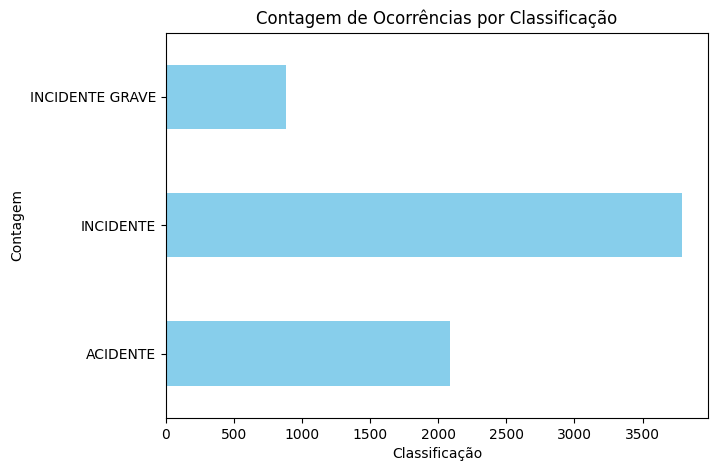

In [119]:
# Gráfico de barras horizontal
# plot.barh é o gráfico de barras horizontais
# figsize (7,5) é o tamanho do gráfico em (largura,altura)
df.groupby(['classificacao']).size().plot.barh(figsize=(7,5), color=['skyblue'])
plt.xlabel('Classificação')
plt.ylabel('Contagem')
plt.title('Contagem de Ocorrências por Classificação')
plt.show()

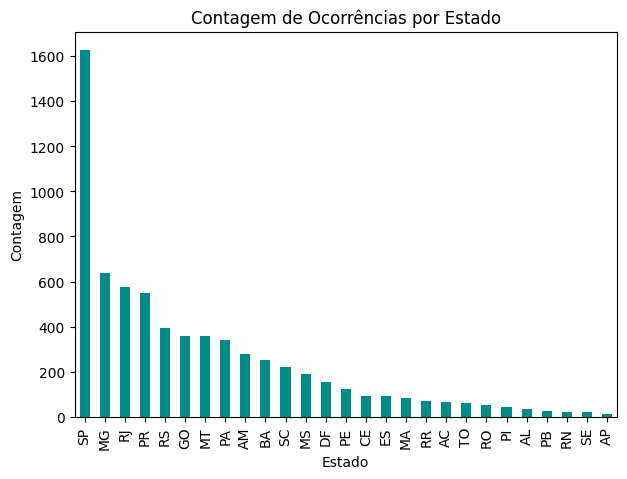

In [120]:
# Gráfico de barras vertical
df.groupby('uf').size().sort_values(ascending=False).plot.bar(figsize=(7,5), color=['DarkCyan'])
plt.xlabel('Estado')
plt.ylabel('Contagem')
plt.title('Contagem de Ocorrências por Estado')
plt.show()

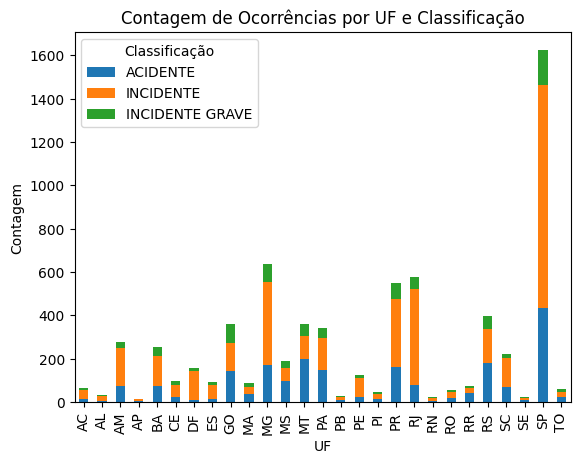

In [121]:
# Gráfico de barras empilhadas da contagem de ocorrências por 'uf' e 'classificacao':
# kind é o tipo de  gráfico
df.groupby(['uf', 'classificacao']).size().unstack().plot(kind='bar', stacked=True)
plt.xlabel('UF')
plt.ylabel('Contagem')
plt.title('Contagem de Ocorrências por UF e Classificação')
plt.legend(title='Classificação')
plt.show()

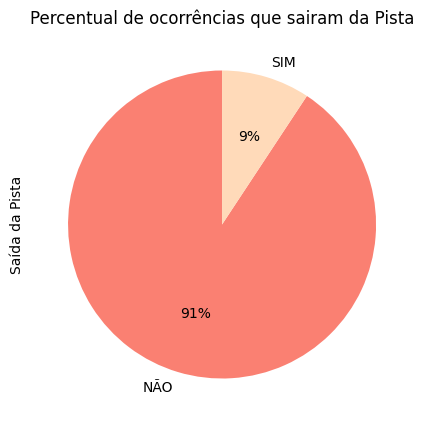

In [122]:
# Gráfico de setores
colors = ['#FA8072', '#FFDAB9']
df.groupby(['saida_pista'],dropna=False).size().sort_values(ascending=False).plot(kind='pie',
                                                                                  ylabel= 'Saída da Pista',
                                                                                  figsize=(7, 5),
                                                                                  autopct='%1.0f%%',
                                                                                  startangle=90,
                                                                                  colors=colors)
plt.title('Percentual de ocorrências que sairam da Pista')
plt.show()

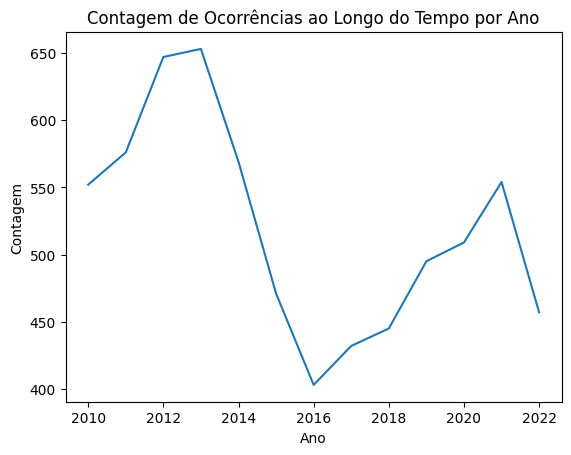

In [123]:
# Gráfico de linha da contagem de ocorrências ao longo do tempo por ano:
df.groupby(df['data'].dt.year).size().plot(kind='line')
plt.xlabel('Ano')
plt.ylabel('Contagem')
plt.title('Contagem de Ocorrências ao Longo do Tempo por Ano')
plt.show()

# **Estatística**

* Medidas importantes para o analista de dados: media, mediana, moda, quartis e desv. padrão

* Gráficos importantes para o analista de dados: Barras, setores, linhas, dispersão, histograma e boxplot




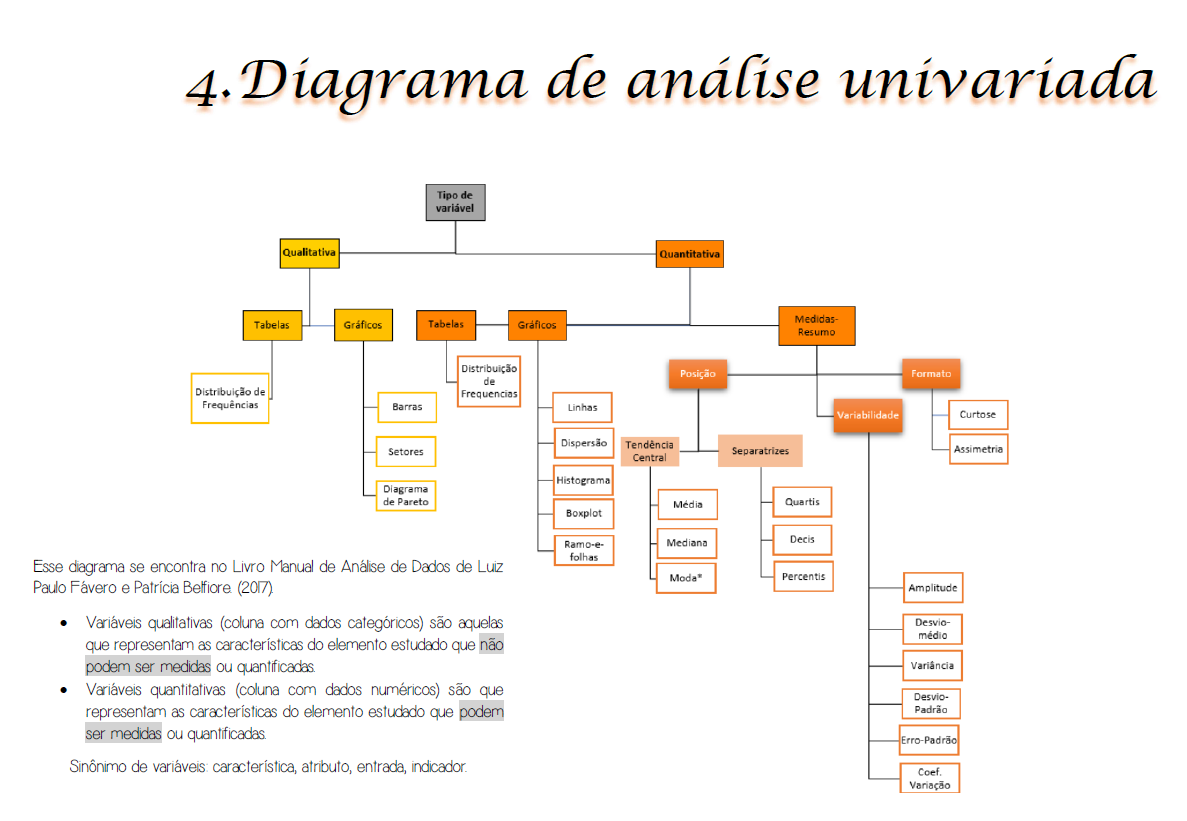

# **Estatísticas descritivas**

In [125]:
df

,código,classificacao,cidade,uf,data,n_aeronaves,saida_pista,ano,mês,dia,horario
0,81027,INCIDENTE GRAVE,SÃO PAULO,SP,2022-09-10,1,SIM,2022,9,10,16
1,81030,INCIDENTE,VITÓRIA,ES,2022-09-10,1,NÃO,2022,9,10,16
2,81023,INCIDENTE GRAVE,AMERICANA,SP,2022-06-10,1,SIM,2022,6,10,15
3,81029,INCIDENTE,BELO HORIZONTE,MG,2022-06-10,1,NÃO,2022,6,10,0
4,81025,INCIDENTE,MANAUS,AM,2022-05-10,1,NÃO,2022,5,10,20
...,...,...,...,...,...,...,...,...,...,...,...
6764,40324,INCIDENTE,PELOTAS,RS,2010-05-01,1,NÃO,2010,5,1,19
6765,39527,ACIDENTE,LUCAS DO RIO VERDE,MT,2010-04-01,1,NÃO,2010,4,1,17
6766,40211,INCIDENTE,RIO DE JANEIRO,RJ,2010-03-01,1,NÃO,2010,3,1,12
6767,40349,INCIDENTE,BELÉM,PA,2010-03-01,1,NÃO,2010,3,1,11


In [124]:
# Método de estatística descritiva
df.describe()

,n_aeronaves,ano,mês,dia,horario
count,6763.000000,6763.000000,6763.000000,6763.000000,6763.000000
mean,1.013308,2015.705308,6.413278,15.635960,15.031495
std,0.118405,3.802537,3.437228,8.830268,4.812151
min,1.000000,2010.000000,1.000000,1.000000,0.000000
25%,1.000000,2012.000000,3.000000,8.000000,12.000000
50%,1.000000,2015.000000,6.000000,16.000000,15.000000
75%,1.000000,2019.000000,9.000000,23.000000,19.000000
max,3.000000,2022.000000,12.000000,31.000000,23.000000


# Conclusão

* As 10 cidades com maior número de aeronaves envolvidas com acidentes:

      RIO DE JANEIRO    374

      SÃO PAULO         330

      BELO HORIZONTE    211

      CAMPINAS          211

      GUARULHOS         186

      GOIÂNIA           170

      BRASÍLIA          159

      LONDRINA          140

      MANAUS            131

      PORTO ALEGRE      115
  

* Mas o estado onde mais ocorre acidentes ainda é SP.

* A maioria são incidentes. Veja:

      INCIDENTE          3792

      ACIDENTE           2087

      INCIDENTE GRAVE     884

* O ano de 2013 foi o ano que mais ocorreu acidentes

* O mês de março foi o mês que mais ocorreu acidentes

* A maioria dos acidentes foram fora do aerodromo

Concluindo, a análise dos dados sobre acidentes aéreos no Brasil revela que as principais cidades onde ocorrem mais acidentes são Rio de Janeiro, São Paulo, Belo Horizonte, Campinas, Guarulhos, Goiânia, Brasília, Londrina, Manaus e Porto Alegre. O estado de São Paulo é o que mais concentra acidentes aéreos, seguido do Rio de Janeiro.

A maioria dos acidentes são incidentes, seguidos de acidentes e incidentes graves. O ano de 2013 foi o ano com mais acidentes, e o mês de março foi o mês com mais acidentes. A maioria dos acidentes ocorreu fora do aeródromo.

Esses dados indicam que a segurança da aviação civil no Brasil precisa ser melhorada. Medidas de prevenção devem ser tomadas para reduzir o número de acidentes e incidentes aéreos.

Aqui estão algumas sugestões específicas para melhorar a segurança da aviação civil no Brasil:

* Investimento em infraestrutura e tecnologia aeronáutica;
* Treinamento mais rigoroso para pilotos e controladores de tráfego aéreo;
* Melhoria da fiscalização e regulamentação da aviação civil;
* Conscientização pública sobre segurança aeronáutica.

A implementação dessas medidas pode contribuir para reduzir o número de acidentes aéreos no Brasil e tornar o transporte aéreo mais seguro para todos.